### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from data_management import data_loading, joint_random_sampling
from plotting import color_plot, plot3d_dataset, plot_target_classes

from mynn.layers import Layer
from mynn.neural_network import NeuralNetwork
from mynn.utils import train_model, plot_training_history

### Data Loading

In [2]:
manip_category = 'poop_and_scoop'
energy_threshold = 0.5
use_cone = False

manip_features = data_loading(manip_category, energy_threshold, use_cone)

### Color Plots

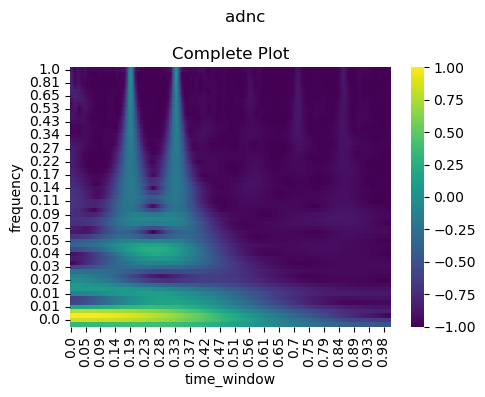

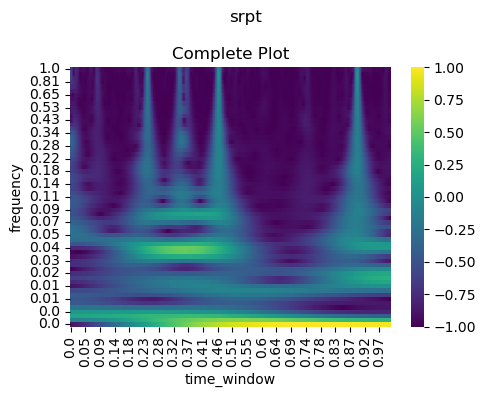

In [3]:
for stock_name, stock_dict in manip_features.items():
    color_plot(stock_dict, stock_name)

### 3D Visualizations

In [4]:
stock_name = 'adnc'
plot_against = 'frequency'
hue_var = 'modulus'

plot3d_dataset(manip_features[stock_name]['features'], stock_name, plot_against, hue_var)

### Split data with random sampling

In [5]:
X_train_all, y_train_label, X_val_all, y_val_label, X_test_all, y_test_label = joint_random_sampling(manip_features, 0.6, 0.5, 'uniform')

# Characteristics filtering
X_train = X_train_all[:, :4]
X_val = X_val_all[:, :4]
X_test = X_test_all[:, :4]

# Target filtering
y_train = X_train_all[:, 4]
y_val = X_val_all[:, 4]
y_test = X_test_all[:, 4]

In [11]:
np.unique(y_train_label, return_counts=True)[1][1]

2765

### Target Distribution Visualization 

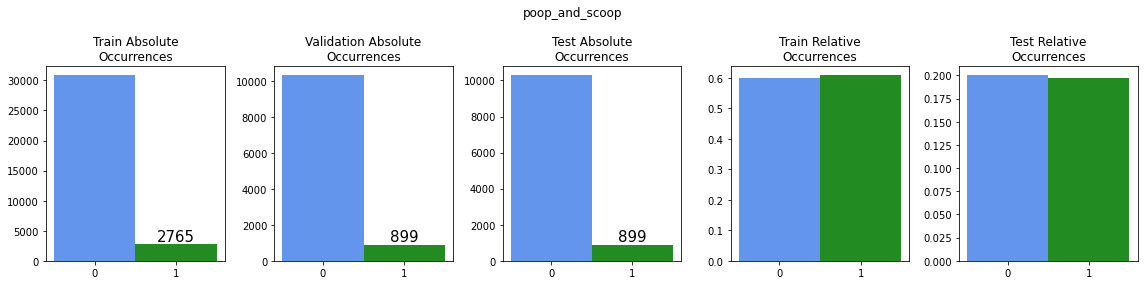

In [8]:
plot_target_classes(y_train_label, y_val_label, y_test_label, manip_category)